In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


## F3METL_Comp

Earnings data from the largest companies within the FTSE 350 Industrial Metals and Mining Index

Steps according to the CRISP-DM process:

### 1.	Business understanding

#### What does the business need?

Insight into the factors that drive the earnings of the companies in the FTSE 350 Metal and Mining.

### 2.  Data understanding 

- What data do we have? 

    Six companies in total:
        - RIO LN Equity  
        - GLEN LN Equity  
        - AAL LN Equity  
        - ANTO LN Equity  
        - EVR LN Equity  
        - BHP LN Equity	
    
    Seven fields per company, indexed by the date:  
        - PX_OPEN: Opening price 
        - PX_HIGH: Daily high 
        - PX_LOW: Daily low 
        - PX_LAST: Last price requested 
        - PX_VOLUME: Number of shares 
        - EBITDA: Earnings before interest, taxes, depreciation, and amortization
        - PE_RATIO: Ratio of the company's share price to its earning per share
    
- Privacy/ethics?  
    No issues as this data is meant to be public.  
       
       
- Is it clean?
    - Missing data before the company went public/was founded
    - Wrong headers
    - Wrong types
    - There is not enough data on BHP LN Equity to analyse (except its EBITDA)


### 3.  Data preparation 

In [8]:
original_data = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col=False)
original_data

,Unnamed: 0,RIO LN Equity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,GLEN LN Equity,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,BHP LN Equity,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
1,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO,PX_OPEN,PX_HIGH,...,PX_VOLUME,EBITDA,PE_RATIO,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
2,#NAME?,1197.851,1239.156,1197.851,1235.025,1086665,1404.1713,25.8085,#NAME?,NaN,...,NaN,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,2489,NaN
3,04/01/2000,1239.156,1243.287,1210.242,1217.677,3585947,1404.1713,25.8338,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2489,NaN
4,05/01/2000,1210.242,1218.503,1159.024,1163.981,3342568,1404.1713,24.782,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2489,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,25/01/2022,5312,5353,5276,5311,2538309,19744,6.1803,391.35,395,...,3070741,2061,6.2323,NaN,NaN,NaN,NaN,NaN,20181,NaN
5759,26/01/2022,5422,5506,5388,5434,2878571,19744,6.3346,394.65,406,...,2865499,2061,6.3396,NaN,NaN,NaN,NaN,NaN,20181,NaN
5760,27/01/2022,5399,5623,5384,5569,2943232,19744,6.4205,393.85,408.25,...,2745585,2061,6.4637,NaN,NaN,NaN,NaN,NaN,20181,NaN
5761,28/01/2022,5628,5665,5365,5386,6162008,19744,6.2169,402,403,...,3847210,2061,6.3724,NaN,NaN,NaN,NaN,NaN,20181,NaN


In [9]:
def F3Metl_Comp_Wrangler(data):
    # Delete the first row (full of null values)
    df = original_data.drop(labels=0)

    # Delete the index column since the date is the index
    df.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    df.set_index('Dates', inplace=True)


    # Rename the column headers 
    df = df.drop(labels='Dates')
    df.columns = pd.MultiIndex.from_product([['RIO LN Equity', 'GLEN LN Equity', 'AAL LN Equity', 'ANTO LN Equity', 'EVR LN Equity', 'BHP LN Equity'], ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'PX_VOLUME', 'EBITDA','PE_RATIO']])

    # Delete rows without dates
    df = df.drop(labels='#NAME?')

    # Reformat dates
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

    # Drop all BHP LN Equity data as it is incomplete
    # However, the EBITDA data might be useful
    # df.drop(columns= [('BHP LN Equity', y) for y in ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'PX_VOLUME', 'EBITDA','PE_RATIO']], inplace=True)

    # Change numbers to floats/ints (fields with NaN values are floats by default)
    df = df.apply(pd.to_numeric)
    return df


In [22]:
df = F3Metl_Comp_Wrangler(original_data)
df

RIO LN Equity                                                      \
                 PX_OPEN   PX_HIGH    PX_LOW   PX_LAST PX_VOLUME      EBITDA   
Dates                                                                          
2000-01-04      1239.156  1243.287  1210.242  1217.677   3585947   1404.1713   
2000-01-05      1210.242  1218.503  1159.024  1163.981   3342568   1404.1713   
2000-01-06      1173.068  1218.503  1173.068  1205.286   9503906   1404.1713   
2000-01-07      1214.373  1226.764  1185.459  1220.982   7508500   1404.1713   
2000-01-10      1224.286  1226.764  1181.329  1193.720   6438418   1404.1713   
...                  ...       ...       ...       ...       ...         ...   
2022-01-25      5312.000  5353.000  5276.000  5311.000   2538309  19744.0000   
2022-01-26      5422.000  5506.000  5388.000  5434.000   2878571  19744.0000   
2022-01-27      5399.000  5623.000  5384.000  5569.000   2943232  19744.0000   
2022-01-28      5628.000  5665.000  5365.000  5386.000   6162008  19744.0000   
2022-01-31      5400.000  5409.000  5178.000  5185.000   3349054  19744.0000   

                    GLEN LN Equity                  ... EVR LN Equity          \
           PE_RATIO        PX_OPEN PX_HIGH  PX_LOW  ...     PX_VOLUME  EBITDA   
Dates                                               ...                         
2000-01-04  25.8338            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-05  24.7820            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-06  25.6770            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-07  25.8881            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-10  25.3255            NaN     NaN     NaN  ...           NaN     NaN   
...             ...            ...     ...     ...  ...           ...     ...   
2022-01-25   6.1803         391.35  395.00  385.55  ...     3070741.0  2061.0   
2022-01-26   6.3346         394.65  406.00  393.55  ...     2865499.0  2061.0   
2022-01-27   6.4205         393.85  408.25  389.95  ...     2745585.0  2061.0   
2022-01-28   6.2169         402.00  403.00  389.85  ...     3847210.0  2061.0   
2022-01-31   6.0059         397.55  398.40  382.10  ...     2175911.0  2061.0   

                    BHP LN Equity                                            \
           PE_RATIO       PX_OPEN PX_HIGH  PX_LOW PX_LAST  PX_VOLUME EBITDA   
Dates                                                                         
2000-01-04      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-05      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-06      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-07      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-10      NaN           NaN     NaN     NaN     NaN        NaN   2489   
...             ...           ...     ...     ...     ...        ...    ...   
2022-01-25   6.2323           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-26   6.3396           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-27   6.4637           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-28   6.3724           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-31   6.3604        2426.0  2426.0  2341.5  2347.0  5257964.0  20181   

                     
           PE_RATIO  
Dates                
2000-01-04      NaN  
2000-01-05      NaN  
2000-01-06      NaN  
2000-01-07      NaN  
2000-01-10      NaN  
...             ...  
2022-01-25      NaN  
2022-01-26      NaN  
2022-01-27      NaN  
2022-01-28      NaN  
2022-01-31      NaN  

[5760 rows x 42 columns]

# Plot index data

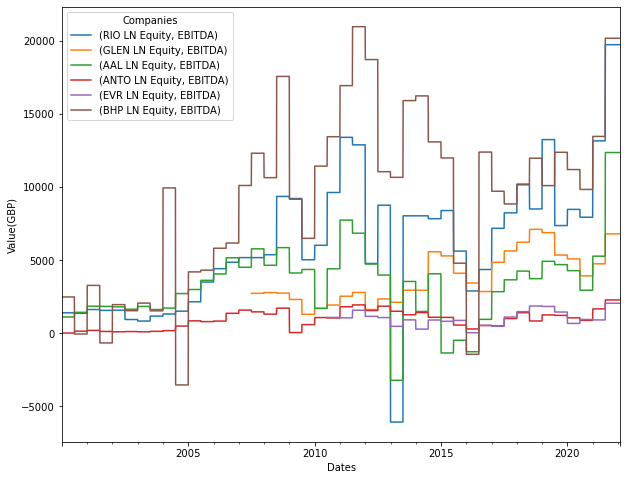

In [43]:
def plotEBITDA(df, company):
    fig = go.Figure(data=go.Ohlc(x=df.index,
                        open=df[company, 'PX_OPEN'],
                        high=df[company,'PX_HIGH'],
                        low=df[company, 'PX_LOW'], 
                        close=df[company, 'PX_LAST']))
    fig.update_layout(title=company, xaxis_title='Time', yaxis_title='Value(GBP)')
    fig.show()
plotEBITDA(df, 'RIO LN Equity')

df1 = df.xs('EBITDA', axis=1, level=1, drop_level=False)
df1.plot(figsize=(10,8), ylabel='Value(GBP)')
plt.legend(title="Companies")
# earnings_fig = px.line(df1, x=df1.index, y=df1.columns, title='EBITDA of the largest companies in FTSE350')